# Mengimport library yang dipakai

In [2]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 156.9 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.2-cp310-cp310-win_amd64.whl (55 kB)
     ---------------------------------------- 3.3/3.3 MB 80.0 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ------------------------------------ 930.9/930.9 KB 106.6 kB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'absl'

# Memuat Dataset

In [ ]:
train_data_dir = "../rusantara2"

BATCH_SIZE = 32
IMG_SIZE = (320, 320)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split

# training dataset 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data

# validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1149 images belonging to 6 classes.
Found 284 images belonging to 6 classes.


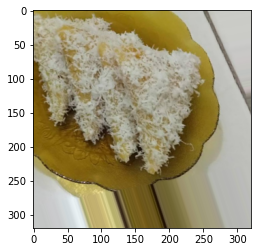

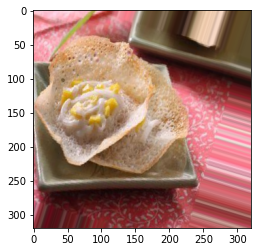

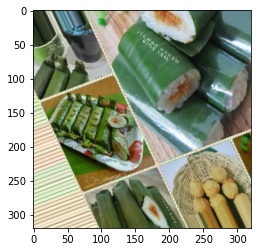

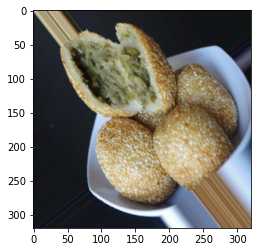

In [ ]:
class_names = ["Dadar Gulung", "Kue Lemper", "Lapis Legit", "Lupis", "Onde-Onde", "Serabi"]

x,y = train_generator.next()
for i in range(4):
    image = x[i]
    label = y[i]
    # plt.title(class_names[int(label)])
    plt.imshow(image)
    plt.show()

# menggunakan model transfer learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
x = tf.keras.layers.Dense(6, activation='softmax')(x)

In [ ]:
model2 = tf.keras.Model(pretrained_model.input, x)
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
history = model2.fit(train_generator, 
                     epochs=20, 
                     steps_per_epoch=10, 
                     validation_data=validation_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/20


: 

: 